In [3]:
!pip install numpy
!pip install pandas
!pip install kaggle

     |████████████████████████████████| 58 kB 921 kB/s 
     |████████████████████████████████| 78 kB 1.4 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73053 sha256=4b72bc851b75574d776fca60df32b3c6480acc39b27bd286b49b7a4d28f3b201
  Stored in directory: /home/stevenv/.cache/pip/wheels/29/da/11/144cc25aebdaeb4931b231e25fd34b394e6a5725cbb2f50106
Successfully built kaggle


In [7]:
!kaggle competitions download -c titanic
!unzip titanic.zip

titanic.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [2]:
import numpy as np
import pandas as pd

In [3]:
train_data = pd.read_csv('train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_data = pd.read_csv('test.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [10]:
women_survived = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women_survived) / len(women_survived)

print("% of women who survived: ", rate_women)

% of women who survived:  0.7420382165605095


In [11]:
men_survived = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men_survived) / len(men_survived)

print("% of men who survived: ", rate_men)

% of men who survived:  0.18890814558058924


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
train_data[['PassengerId','Name','Age']]

,PassengerId,Name,Age
0,1,"Braund, Mr. Owen Harris",22.0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0
2,3,"Heikkinen, Miss. Laina",26.0
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0
4,5,"Allen, Mr. William Henry",35.0
...,...,...,...
886,887,"Montvila, Rev. Juozas",27.0
887,888,"Graham, Miss. Margaret Edith",19.0
888,889,"Johnston, Miss. Catherine Helen ""Carrie""",NaN
889,890,"Behr, Mr. Karl Howell",26.0


In [15]:
male_passengers = train_data.loc[train_data.Sex == 'male']
print('Number of male passengers: {0}'.format(len(male_passengers)))

Number of male passengers: 577


In [23]:
male_passengers_first_class = train_data.loc[((train_data.Sex == 'male') & (train_data.Pclass == 1))]
print('Number of male passengers in first class: {0}'.format(len(male_passengers_first_class)))

Number of male passengers in first class: 122


In [24]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [25]:
print('Mean fare: {0}'.format(train_data.Fare.mean()))
print('Median fare: {0}'.format(train_data.Fare.median()))

Mean fare: 32.2042079685746
Median fare: 14.4542


In [26]:
# dispersion measures
print('Min fare : {0}'.format(train_data.Fare.min())) # minimum
print('Max fare : {0}'.format(train_data.Fare.max())) # maximum
print('Fare range : {0}'.format(train_data.Fare.max()  - train_data.Fare.min())) # range
print('25 percentile : {0}'.format(train_data.Fare.quantile(.25))) # 25 percentile
print('50 percentile : {0}'.format(train_data.Fare.quantile(.5))) # 50 percentile
print('75 percentile : {0}'.format(train_data.Fare.quantile(.75))) # 75 percentile
print('Variance fare : {0}'.format(train_data.Fare.var())) # variance
print('Standard deviation fare : {0}'.format(train_data.Fare.std())) # standard deviation

Min fare : 0.0
Max fare : 512.3292
Fare range : 512.3292
25 percentile : 7.9104
50 percentile : 14.4542
75 percentile : 31.0
Variance fare : 2469.436845743117
Standard deviation fare : 49.693428597180905


<AxesSubplot:>

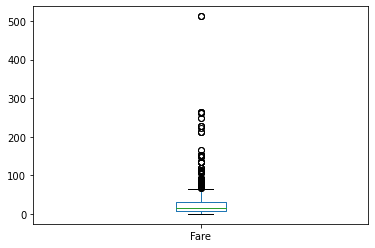

In [28]:
train_data.Fare.plot(kind='box')

<AxesSubplot:>

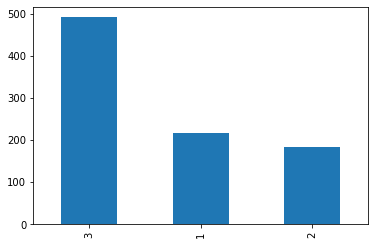

In [29]:
train_data.Pclass.value_counts().plot(kind='bar')

<AxesSubplot:title={'center':'Class wise passenger count'}>

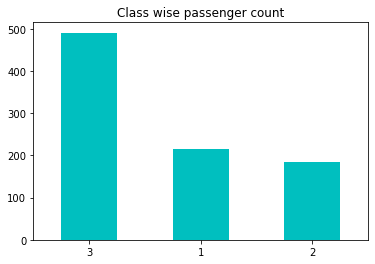

In [31]:
train_data.Pclass.value_counts().plot(kind='bar',rot = 0, title='Class wise passenger count', color='c')

<AxesSubplot:title={'center':'Histogram for Age'}, ylabel='Frequency'>

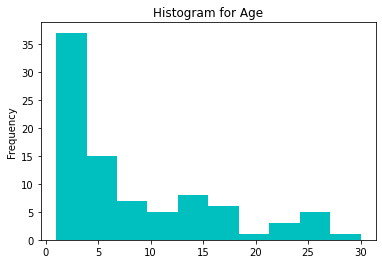

In [32]:
train_data.Age.value_counts().plot(kind='hist', title='Histogram for Age', color='c')

<AxesSubplot:title={'center':'Scatter Plot: Age vs Fare'}, xlabel='Age', ylabel='Fare'>

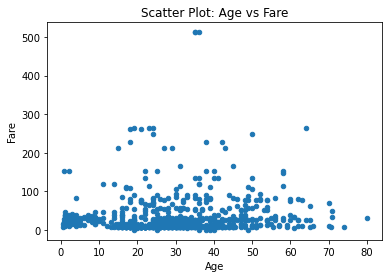

In [33]:
train_data.plot.scatter(title='Scatter Plot: Age vs Fare',x = 'Age', y = 'Fare')

In [37]:
train_data.groupby('Sex').Age.median()

Sex
female    27.0
male      29.0
Name: Age, dtype: float64

In [38]:
aggregations = {
    'Fare': { # work on the "Fare" column
        'mean_Fare': 'mean',  # get the mean fare
        'median_Fare': 'median', # get median fare
        'max_Fare': max,
        'min_Fare': np.min
    },
    'Age': {     # work on the "Age" column
        'median_Age': 'median',   # Find the max, call the result "max_date"
        'min_Age': min,
        'max_Age': max,
        'range_Age': lambda x: max(x) - min(x)  # Calculate the age range per group
    }
}

In [46]:
train_data.groupby('Pclass').aggregate({'Fare': 'median', 'Age': 'median'})

,Fare,Age
Pclass,,
1,60.2875,37.0
2,14.2500,29.0
3,8.0500,24.0
